Input shape (X): (55000, 1685)
Target shape (y): (55000, 1)
Input dimension: 1685


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │     1,726,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,785 (9.24 MB)

 Trainable params: 2,419,201 (9.23 MB)

 Non-trainable params: 3,584 (14.00 KB)

Epoch 1/300
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 2.4772 - mae: 0.8145 - val_loss: 1.3930 - val_mae: 0.5826 - learning_rate: 0.0010
Epoch 2/300
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 1.1965 - mae: 0.4988 - val_loss: 0.7160 - val_mae: 0.4055 - learning_rate: 0.0010
Epoch 3/300
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.7323 - mae: 0.4520 - val_loss: 0.5472 - val_mae: 0.4143 - learning_rate: 0.0010
Epoch 4/300
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.5828 - mae: 0.4482 - val_loss: 0.4644 - val_mae: 0.3962 - learning_rate: 0.0010
Epoch 5/300
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.5161 - mae: 0.4317 - val_loss: 0.4357 - val_mae: 0.3926 - learning_rate: 0.0010
Epoch 6/300
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.5079 - mae: 0.4367 - val_loss: 0.4401 - val_mae: 0.3846 - learning_rate: 0.0010
Epoch 7/300
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.4948 - mae: 0.4304 - val_loss: 0.4266 - val_mae: 0.

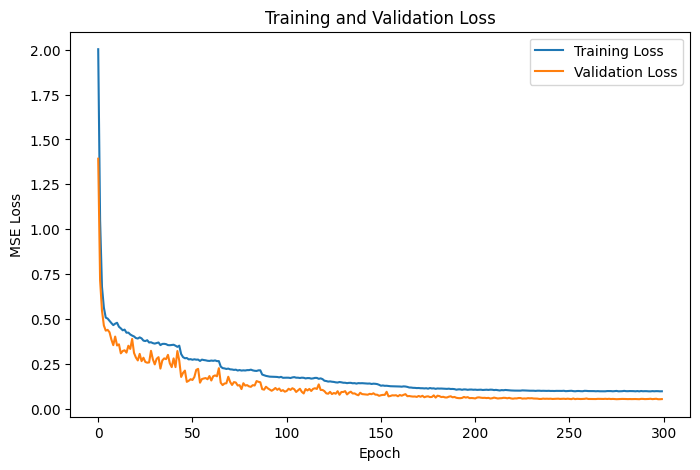

344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Overall Percentage Errors:
KP: 147.62%


In [1]:
# Cell 1: Data Preparation with W and L as Inputs
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MOSFET parameter and measurement data
params_df = pd.read_csv('mosfet_params_level3_v11.csv')
measurements_df = pd.read_csv('measurements_level3_v11.csv')

# Group measurements and prepare input features
X_list = []
mosfet_ids = []

grouped = measurements_df.groupby('MOSFET_ID')
for mosfet_id, group in grouped:
    group_sorted = group.sort_values('meas_index')
    if len(group_sorted) == 561:
        measurement_features = group_sorted[['VGS', 'VDS', 'ID']].values.flatten()
        W = params_df.loc[params_df['MOSFET_ID'] == mosfet_id, 'W'].values[0]
        L = params_df.loc[params_df['MOSFET_ID'] == mosfet_id, 'L'].values[0]
        features = np.concatenate([measurement_features, [W, L]])
        X_list.append(features)
        mosfet_ids.append(mosfet_id)

X = np.array(X_list)

# Prepare target (KP) with log transformation
params_df.set_index('MOSFET_ID', inplace=True)
y_list = []
for mosfet_id in mosfet_ids:
    kp = params_df.loc[mosfet_id, 'KP']
    y_list.append(np.log1p(kp))
y = np.array(y_list).reshape(-1, 1)

print("Input shape (X):", X.shape)
print("Target shape (y):", y.shape)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the inputs and outputs
input_scaler = StandardScaler()
X_train_scaled = input_scaler.fit_transform(X_train)
X_test_scaled = input_scaler.transform(X_test)

output_scaler = StandardScaler()
y_train_scaled = output_scaler.fit_transform(y_train)
y_test_scaled = output_scaler.transform(y_test)

# Cell 2: Clear Previous Model
import tensorflow as tf
from tensorflow.keras import backend as K

# K.clear_session()
tf.random.set_seed(42)

# Cell 3: Enhanced Model Definition with Fixed Learning Rate
from tensorflow import keras
from tensorflow.keras import layers

input_dim = X_train_scaled.shape[1]
print("Input dimension:", input_dim)

model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Use a fixed learning rate compatible with ReduceLROnPlateau
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()

# Cell 4: Model Training with Early Stopping and Learning Rate Reduction
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=300,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Cell 5: Plotting Training History
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Cell 6: Evaluation with Inverse Transformation
predictions_scaled = model.predict(X_test_scaled)
predictions = np.expm1(output_scaler.inverse_transform(predictions_scaled))
y_test_original = np.expm1(output_scaler.inverse_transform(y_test_scaled))

epsilon = 1e-10
percentage_errors = np.abs((predictions - y_test_original) / (y_test_original + epsilon)) * 100
mean_percentage_errors = np.mean(percentage_errors, axis=0)

parameter_names = ["KP"]
print("\nOverall Percentage Errors:")
for i, param in enumerate(parameter_names):
    print(f"{param}: {mean_percentage_errors[i]:.2f}%")

In [ ]:
# Cell 7: Save the Model
#model.save('mosfet_level3_kp_model_v2.keras')

In [2]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

# Define the minimum KP for clipping (only bottom clipping)
KP_MIN = 50e-6  # 0.000050, from your dataset range

# Function to compute and print metrics
def compute_metrics(y_true, y_pred, label):
    epsilon = 1e-10  # Small value to avoid division by zero
    percentage_errors = np.abs((y_pred - y_true) / (y_true + epsilon)) * 100
    mpe = np.mean(percentage_errors)
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    print(f"\n{label}:")
    print(f"Mean Percentage Error: {mpe:.2f}%")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.15f}")
    print(f"RMSE: {rmse:.10f}")
    return percentage_errors

# Get predictions
predictions_scaled = model.predict(X_test_scaled)
predictions_unclipped = np.expm1(output_scaler.inverse_transform(predictions_scaled))
y_test_original = np.expm1(output_scaler.inverse_transform(y_test_scaled))

# Total number of test samples
n_samples = len(y_test_original)

# Compute metrics without clipping
percentage_errors_unclipped = compute_metrics(y_test_original, predictions_unclipped, "Without Clipping")

# Clip predictions only from below (values < KP_MIN)
predictions_clipped = np.maximum(predictions_unclipped, KP_MIN)
percentage_errors_clipped = compute_metrics(y_test_original, predictions_clipped, "With Bottom Clipping")

# Clipping statistics (only tracking below KP_MIN)
n_clipped_below = np.sum(predictions_unclipped < KP_MIN)
pct_clipped_below = (n_clipped_below / n_samples) * 100

# Summary stats with clipping details
print("\nSummary Stats:")
print("True KP min/max/mean:", y_test_original.min(), y_test_original.max(), y_test_original.mean())
print("Unclipped Predictions min/max/mean:", predictions_unclipped.min(), predictions_unclipped.max(), predictions_unclipped.mean())
print("Clipped Predictions min/max/mean:", predictions_clipped.min(), predictions_clipped.max(), predictions_clipped.mean())
print(f"\nClipping Details (out of {n_samples} samples):")
print(f"Values clipped below {KP_MIN}: {n_clipped_below} ({pct_clipped_below:.2f}%)")

344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Without Clipping:
Mean Percentage Error: 147.62%
R² Score: -5348.5372
MSE: 0.000090921313411
RMSE: 0.0095352668

With Bottom Clipping:
Mean Percentage Error: 6.72%
R² Score: 0.9711
MSE: 0.000000000490583
RMSE: 0.0000221491

Summary Stats:
True KP min/max/mean: 5.000679756356907e-05 0.0004999509434650001 0.0002761488353345906
Unclipped Predictions min/max/mean: -1.0 0.00051204965 0.00018443541
Clipped Predictions min/max/mean: 5e-05 0.00051204965 0.00027534904

Clipping Details (out of 11000 samples):
Values clipped below 5e-05: 1 (0.01%)
